# 4.Value_at_risk_VAR
## Estimating tail risk
### Historical drawdown
The stock market tends to rise over time, but that doesn't mean that you won't have periods of drawdown.

Drawdown can be measured as the percentage loss from the highest cumulative historical point.

In Python, you can use the .accumulate() and .maximum() functions to calculate the running maximum, and the simple formula below to calculate drawdown:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

def rent_data():
    cum_rets = pd.DataFrame(pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/dfe9da08c986709d59943d1d5c0106537a8c608a/USO.csv'))


    cum_rets.Date = pd.to_datetime(cum_rets.Date)

    cum_rets  = cum_rets\
                    .set_index('Date')
    
    return cum_rets

cum_rets = rent_data()
cum_rets

,USO
Date,
2007-01-03,-0.042636
2007-01-04,-0.040688
2007-01-05,0.009285
2007-01-08,-0.007109
2007-01-09,-0.004001
...,...
2017-12-22,0.001718
2017-12-26,0.024871
2017-12-27,-0.002510


In [3]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)
# Ensure the value never drops below 1
running_max[running_max < 1] = 1

running_max

,USO
Date,
2007-01-03,1.0
2007-01-04,1.0
2007-01-05,1.0
2007-01-08,1.0
2007-01-09,1.0
...,...
2017-12-22,1.0
2017-12-26,1.0
2017-12-27,1.0


In [4]:

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

drawdown

,USO
Date,
2007-01-03,-1.042636
2007-01-04,-1.040688
2007-01-05,-0.990715
2007-01-08,-1.007109
2007-01-09,-1.004001
...,...
2017-12-22,-0.998282
2017-12-26,-0.975129
2017-12-27,-1.002510


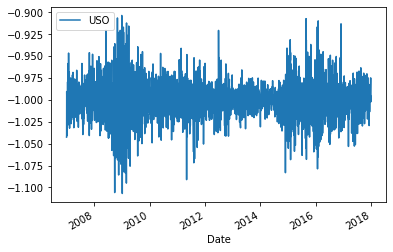

In [5]:
# Plot the results
drawdown.plot()
plt.show()

**Notice how the drawdown never goes above 0 (as opposed to the previous plot)? That's because a positive drawdown isn't a drawdown at all - its a gain!**

### Historical value at risk
Drawdown is a measure of sustained losses over time, but what about simple single-day movements?

Value at Risk, often referred to as VaR, is a way to estimate the risk of a single day negative price movement. VaR can be measured for any given probability, or confidence level, but the most commonly quoted tend to be VaR(95) and VaR(99). Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which may not be a good assumption of the future. Historical VaR(95), for example, represents the minimum loss that your portfolio or asset has sustained in the worst 5% of cases.

Below, you will calculate the historical VaR(95) of the USO oil ETF. Returns data is available (in percent) in the variable StockReturns_perc.

In [6]:



cum_rets = rent_data()


StockReturns_perc = cum_rets['USO']*100
StockReturns_perc

Date
2007-01-03   -4.263558
2007-01-04   -4.068832
2007-01-05    0.928472
2007-01-08   -0.710851
2007-01-09   -0.400091
                ...   
2017-12-22    0.171821
2017-12-26    2.487136
2017-12-27   -0.251046
2017-12-28    0.419463
2017-12-29    0.334169
Name: USO, Length: 2769, dtype: float64

In [7]:
# Calculate historical VaR(95)

error = 5
var_95 = np.percentile(StockReturns_perc, error)
print('En el peor {} % de los casos las perdidas no superaran el {} % '.format(error,var_95 ))



En el peor 5 % de los casos las perdidas no superaran el -3.608233764037496 % 


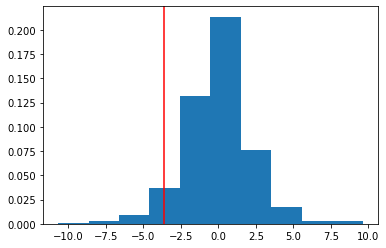

In [8]:
# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label='VaR 95: {0:.2f}%'.format(var_95))
plt.show()

### Historical expected shortfall
Expected Shortfall, otherwise known as CVaR, or conditional value at risk, is simply the expected loss of the worst case scenarios of returns.

For example, if your portfolio has a VaR(95) of -3%, then the CVaR(95) would be the average value of all losses exceeding -3%.

Returns data is available (in percent) in the variable StockReturns_perc. var_95 from the previous exercise is also available in your workspace.

In [9]:
# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print('En el {} % peor de los caoss, las pérdidas SUPERARAN de media el {} % historico '.format(error, cvar_95))


En el 5 % peor de los caoss, las pérdidas SUPERARAN de media el -5.054143158346779 % historico 


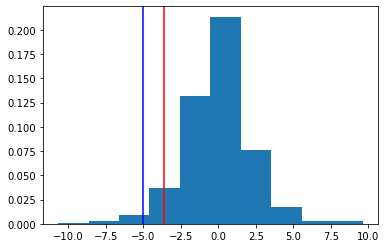

In [10]:

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

## VaR extensions
### Changing VaR and CVaR quantiles
VaR quantiles often used are 90%, 95%, and 99%, corresponding to the worst 10%, 5%, and 1% of cases respectively. These same quantiles are also often used for CVaR. Note that CVaR will always be a more extreme estimate when compared with VaR for the same quantile.

Compare the VaR vs CVaR values for USO ETF returns below.

Returns data is available (in percent) in StockReturns_perc. We also calculated var_95, cvar_95, var_99, cvar_99 and defined a function plot_hist() that compares several quantiles for you.

In [11]:
# Historical VaR quantiles
var_90 = np.percentile(StockReturns_perc, 10)
print(var_90)


-2.558512646965176


In [12]:
# Historical CVaR quantiles
cvar_90 = StockReturns_perc[StockReturns_perc <= var_90].mean()
print(cvar_90)


-4.04318677051881


In [13]:
import os

while 'ANALYSIS' not in os.listdir(): 
    
    os.chdir('..')

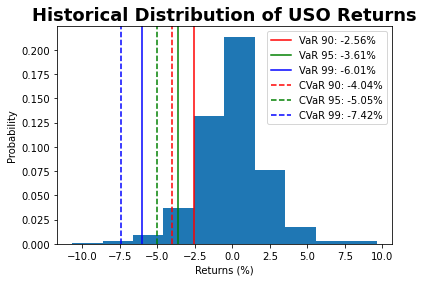

In [14]:
from ANALYSIS.f_functions.plot_hist import plot_hist

# Plot to compare
var_95 = np.percentile(StockReturns_perc, 5)
var_99 = np.percentile(StockReturns_perc, 1)
cvar_99 =  StockReturns_perc[StockReturns_perc <= var_99].mean()



plot_hist(sorted_rets,var_90, var_95, var_99, cvar_90, cvar_95, cvar_99)

**The CVaR(90) is -4.04%, which is higher than the VaR(90) of -2.56%.**

### Parametric VaR
Value at Risk can also be computed parametrically using a method known as variance/co-variance VaR. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values. You can calculate the parametric VaR(90) using:


```
# Import norm from scipy.stats
from scipy.stats import norm

# Calculate Parametric VaR
norm.ppf(confidence_level=0.10, mu, vol)

```
where mu and vol are the mean and volatility, respectively.

Returns data is available (in decimals) in the variable StockReturns.

In [15]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
StockReturns = rent_data()

mu = np.mean(StockReturns)

# Estimate the daily volatility
vol = np.std(StockReturns)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  USO   -0.000286
dtype: float64 
Volatility:  USO    0.021888
dtype: float64 
VaR(95):  [-0.03628909]


**The parametric VaR(95) is -3.63%.**

### Scaling risk estimates
The VaR(95) number calculated in previous exercises is simply the value at risk for a single day. To estimate the VaR for a longer time horizon, scale the value by the square root of time, similar to scaling volatility:

```

VaR(95)t days = VaR(95)1 day * np.sqrt(t)

```

StockReturns_perc and var_95 from the previous exercise is available in your workspace. Use this data to estimate the VaR for the USO oil ETF for 1 to 100 days from now. We've also defined a function plot_var_scale() that plots the VaR for 1 to 100 days from now.

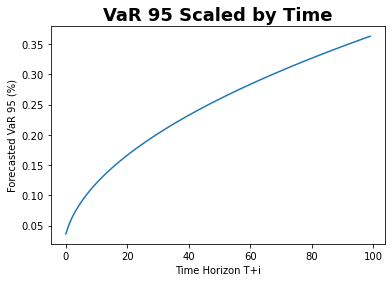

In [16]:
from ANALYSIS.f_functions.plot_var_scale import plot_var_scale

# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(0, 100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95*np.sqrt(i+1)
    
# Plot the results
plot_var_scale(forecasted_values)

## Random walks
### A random walk simulation
Stochastic or random movements are used in physics to represent particle and fluid movements, in mathematics to describe fractal behavior, and in finance to describe stock market movements.

Use the np.random.normal() function to model random walk movements of the USO oil ETF with a constant daily average return (mu) and average daily volatility (vol) over the course of T trading days.

In [19]:
# Set the simulation parameters
mu = np.mean(StockReturns)
vol = np.std(StockReturns)
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1
rand_rets[:10]

array([0.99853507, 0.98909432, 1.03142067, 1.00434341, 1.00405199,
       0.96700203, 1.01268617, 0.98761418, 1.00359683, 0.99241999])

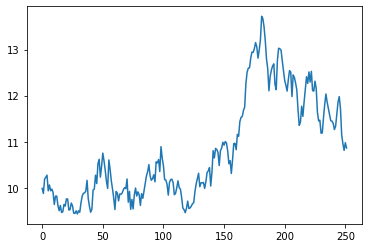

In [20]:

# Forecasted random walk
forecasted_values = S0*rand_rets.cumprod()

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

**Cool! You just made your first random walker simulation!**

### Monte Carlo simulations
Monte-Carlo simulations are used to model a wide range of possibilities.

Monte-Carlos can be constructed in many different ways, but all of them involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This can allow you to build a comprehensive forecast of possibilities to sample from without a large amount of historical data.

Generate 100 Monte-Carlo simulations for the USO oil ETF.

The parameters mu, vol, T, and S0 are available from the previous exercise.

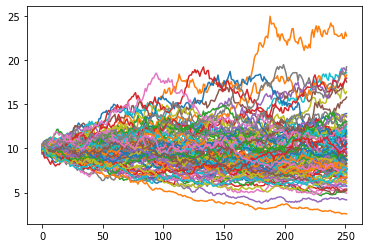

In [21]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu,vol,T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

### Monte Carlo VaR
Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

Aggregate the returns data at each iteration, and use the resulting values to forecast parametric VaR(99).

The parameters mu, vol, T, and S0 are available from the previous exercise.

In [24]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

print('En el peor {} % de los casos las perdidas no superaran el {} % '.format(1,var_99 * 100 ))

Parametric VaR(99):  -5.12 %
En el peor 1 % de los casos las perdidas no superaran el -5.1184089614972805 % 
